# Analysis of Yelp Business Intelligence Data

We will analyze a subset of Yelp's business, reviews and user data. This dataset comes to us from [Kaggle](https://www.kaggle.com/yelp-dataset/yelp-dataset) although we have taken steps to pull this data into a publis s3 bucket: `s3://sta9760-yelpdataset/yelp-light/*business.json`

# Installation and Initial Setup

Begin by installing the necessary libraries that you may need to conduct your analysis. At the very least, you must install `pandas` and `matplotlib`

In [1]:
sc.list_packages()
sc.install_pypi_package('pandas==1.0.3')
sc.install_pypi_package('seaborn==0.11.1')
sc.install_pypi_package('matplotlib==3.2.1')
sc.list_packages()

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
4,application_1619195316014_0005,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version
-------------------------- -------
beautifulsoup4             4.8.1
boto                       2.49.0
jmespath                   0.9.4
lxml                       4.4.2
mysqlclient                1.4.6
nltk                       3.4.5
nose                       1.3.4
numpy                      1.14.5
pip                        21.0.1
py-dateutil                2.2
python36-sagemaker-pyspark 1.2.6
pytz                       2019.3
PyYAML                     3.11
setuptools                 56.0.0
six                        1.13.0
soupsieve                  1.9.5
wheel                      0.36.2
windmill                   1.6

  Using cached pandas-1.0.3-cp36-cp36m-manylinux1_x86_64.whl (10.0 MB)
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)

  Using cached seaborn-0.11.1-py3-none-any.whl (285 kB)
  Using cached scipy-1.5.4-cp36-cp36m-manylinux1_x86_64.whl (25.9 MB)
  Using cached matplotlib-3.3.4-cp36-cp36m-manylinux1_x86_64.whl (11

## Importing

Now, import the installed packages from the previous block below.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Loading Data

We are finally ready to load data. Using `spark` load the data from S3 into a `dataframe` object that we can manipulate further down in our analysis.

In [3]:
df            =  spark.read.json('s3://sta9760-yelp-project02/*.json')
yelp_business =  spark.read.json('s3://sta9760-yelp-project02/yelp_academic_dataset_business.json')
yelp_checkin  =  spark.read.json('s3://sta9760-yelp-project02/yelp_academic_dataset_checkin.json')
yelp_review   =  spark.read.json( 's3://sta9760-yelp-project02/yelp_academic_dataset_review.json')
yelp_tip      =  spark.read.json('s3://sta9760-yelp-project02/yelp_academic_dataset_tip.json')
yelp_user     =  spark.read.json('s3://sta9760-yelp-project02/yelp_academic_dataset_user.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
yelp_business.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+--------------------+--------------------+--------------------+-----------+--------------------+-------+-------------+---------------+--------------------+-----------+------------+-----+-----+
|            address|          attributes|         business_id|          categories|       city|               hours|is_open|     latitude|      longitude|                name|postal_code|review_count|stars|state|
+-------------------+--------------------+--------------------+--------------------+-----------+--------------------+-------+-------------+---------------+--------------------+-----------+------------+-----+-----+
|       921 Pearl St|[,, 'beer_and_win...|6iYb2HFDywm3zjuRg...|Gastropubs, Food,...|    Boulder|[11:0-23:0, 11:0-...|      1|   40.0175444|   -105.2833481| Oskar Blues Taproom|      80302|          86|  4.0|   CO|
|7000 NE Airport Way|[,, u'beer_and_wi...|tCbdrRPZA0oiIYSmH...|Salad, Soup, Sand...|   Portland|[5:0-18:0, 5:0-18...|      1|45.5889058992|-122.

## Overview of Data

Display the number of rows and columns in our dataset.

In [5]:
print(f'Total Columns: {len(df.dtypes)}')
print(f'Total Rows: {df.count():,}')

print(f'Business Columns: {len(yelp_business.dtypes)}')
print(f'Business Rows: {yelp_business.count():,}')


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 38
Total Rows: 12,286,440
Business Columns: 14
Business Rows: 160,585

Display the DataFrame schema below.

In [6]:
df.printSchema()

yelp_business.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

Display the first 5 rows with the following columns:

* `business_id`
* `name`
* `city`
* `state`
* `categories`

In [7]:
yelp_business.select(['business_id','name','city','state','categories']).show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+-----------+-----+--------------------+
|         business_id|                name|       city|state|          categories|
+--------------------+--------------------+-----------+-----+--------------------+
|6iYb2HFDywm3zjuRg...| Oskar Blues Taproom|    Boulder|   CO|Gastropubs, Food,...|
|tCbdrRPZA0oiIYSmH...|Flying Elephants ...|   Portland|   OR|Salad, Soup, Sand...|
|bvN78flM8NLprQ1a1...|      The Reclaimory|   Portland|   OR|Antiques, Fashion...|
|oaepsyvc0J17qwi8c...|         Great Clips|Orange City|   FL|Beauty & Spas, Ha...|
|PE9uqAjdw0E4-8mjG...|   Crossfit Terminus|    Atlanta|   GA|Gyms, Active Life...|
+--------------------+--------------------+-----------+-----+--------------------+
only showing top 5 rows

# Analyzing Categories

Let's now answer this question: **how many unique categories are represented in this dataset?**

Essentially, we have the categories per business as a list - this is useful to quickly see what each business might be represented as but it is difficult to easily answer questions such as:

* How many businesses are categorized as `Active Life`, for instance
* What are the top 20 most popular categories available?

## Association Table

We need to "break out" these categories from the business ids? One common approach to take is to build an association table mapping a single business id multiple times to each distinct category.

For instance, given the following:


| business_id | categories |
|-------------|------------|
| abcd123     | a,b,c      |

We would like to derive something like:

| business_id | category |
|-------------|------------|
| abcd123     | a          |
| abcd123     | b          |
| abcd123     | c          |


What this does is allow us to then perform a myriad of rollups and other analysis on this association table which can aid us in answering the questions asked above.

Implement the code necessary to derive the table described from your original yelp dataframe.

In [57]:
from pyspark.sql.functions import explode, split, trim
business_cat            =  yelp_business.select('business_id' , 'categories')
business_cat            =  business_cat.withColumn('categories', trim(business_cat.categories))
business_exploded_cat   =  business_cat.withColumn('categories',explode(split('categories',", ")))
business_exploded_cat.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+
|         business_id|          categories|
+--------------------+--------------------+
|6iYb2HFDywm3zjuRg...|          Gastropubs|
|6iYb2HFDywm3zjuRg...|                Food|
|6iYb2HFDywm3zjuRg...|        Beer Gardens|
|6iYb2HFDywm3zjuRg...|         Restaurants|
|6iYb2HFDywm3zjuRg...|                Bars|
|6iYb2HFDywm3zjuRg...|American (Traditi...|
|6iYb2HFDywm3zjuRg...|            Beer Bar|
|6iYb2HFDywm3zjuRg...|           Nightlife|
|6iYb2HFDywm3zjuRg...|           Breweries|
|tCbdrRPZA0oiIYSmH...|               Salad|
|tCbdrRPZA0oiIYSmH...|                Soup|
|tCbdrRPZA0oiIYSmH...|          Sandwiches|
|tCbdrRPZA0oiIYSmH...|               Delis|
|tCbdrRPZA0oiIYSmH...|         Restaurants|
|tCbdrRPZA0oiIYSmH...|               Cafes|
|tCbdrRPZA0oiIYSmH...|          Vegetarian|
|bvN78flM8NLprQ1a1...|            Antiques|
|bvN78flM8NLprQ1a1...|             Fashion|
|bvN78flM8NLprQ1a1...|                Used|
|bvN78flM8NLprQ1a1...|Vintage & 

In [58]:
business_exploded_cat.select(['business_id','categories']).show(5)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------+
|         business_id|  categories|
+--------------------+------------+
|6iYb2HFDywm3zjuRg...|  Gastropubs|
|6iYb2HFDywm3zjuRg...|        Food|
|6iYb2HFDywm3zjuRg...|Beer Gardens|
|6iYb2HFDywm3zjuRg...| Restaurants|
|6iYb2HFDywm3zjuRg...|        Bars|
+--------------------+------------+
only showing top 5 rows

Display the first 5 rows of your association table below.

## Total Unique Categories

Finally, we are ready to answer the question: **what is the total number of unique categories available?**

Below, implement the code necessary to calculate this figure.

In [59]:
business_exploded_cat.select('categories').distinct().show()
business_exploded_cat.select('categories').distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+
|          categories|
+--------------------+
|    Historical Tours|
|      Dermatologists|
|      Paddleboarding|
|    Hot Air Balloons|
| Mobile Home Dealers|
|       Data Recovery|
|       Skating Rinks|
|       Videographers|
|   Pet Waste Removal|
|         Boat Repair|
|              Fondue|
|     Pet Photography|
|             Beaches|
|        Aerial Tours|
|        Contract Law|
|Faith-based Crisi...|
|            Day Spas|
|         Hobby Shops|
|               Reiki|
|            Honduran|
+--------------------+
only showing top 20 rows

1330

## Top Categories By Business

Now let's find the top categories in this dataset by rolling up categories.

### Counts of Businesses / Category

So now, let's unroll our distinct count a bit and display the per count value of businesses per category.

The expected output should be:

| category | count |
|-------------|------------|
| a     | 15         |
| b     | 2          |
| c     | 45          |

Or something to that effect.

In [60]:
business_exploded_cat = business_exploded_cat.filter(business_exploded_cat.categories != "\\N")
distict_bus_counts = business_exploded_cat.groupby('categories').count()
distict_bus_counts.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|          categories|count|
+--------------------+-----+
|    Historical Tours|   78|
|      Dermatologists|  351|
|      Paddleboarding|   67|
| Mobile Home Dealers|    6|
|    Hot Air Balloons|    8|
|       Data Recovery|  141|
|       Videographers|  110|
|         Boat Repair|   77|
|       Skating Rinks|   84|
|              Fondue|   33|
|     Pet Photography|   41|
|             Beaches|   86|
|        Contract Law|   12|
|        Aerial Tours|    8|
|   Pet Waste Removal|   16|
|Faith-based Crisi...|    2|
|            Day Spas| 2356|
|         Hobby Shops|  610|
|               Reiki|  277|
|            Honduran|   12|
+--------------------+-----+
only showing top 20 rows

### Bar Chart of Top Categories

With this data available, let us now build a barchart of the top 20 categories. 

**HINT**: don't forget about the matplotlib magic!

```
%matplot plt
```

In [61]:
barchart_df = business_exploded_cat.groupby('categories').count().orderBy('count',ascending=False)
barchart_df.show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|          categories|count|
+--------------------+-----+
|         Restaurants|50763|
|                Food|29469|
|            Shopping|26205|
|       Beauty & Spas|16574|
|       Home Services|16465|
|    Health & Medical|15102|
|      Local Services|12192|
|           Nightlife|11990|
|                Bars|10741|
|          Automotive|10119|
|Event Planning & ...| 9644|
|         Active Life| 9231|
|        Coffee & Tea| 7725|
|          Sandwiches| 7272|
|             Fashion| 6599|
|American (Traditi...| 6541|
|         Hair Salons| 5900|
|               Pizza| 5756|
|     Hotels & Travel| 5703|
|  Breakfast & Brunch| 5505|
+--------------------+-----+
only showing top 20 rows

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

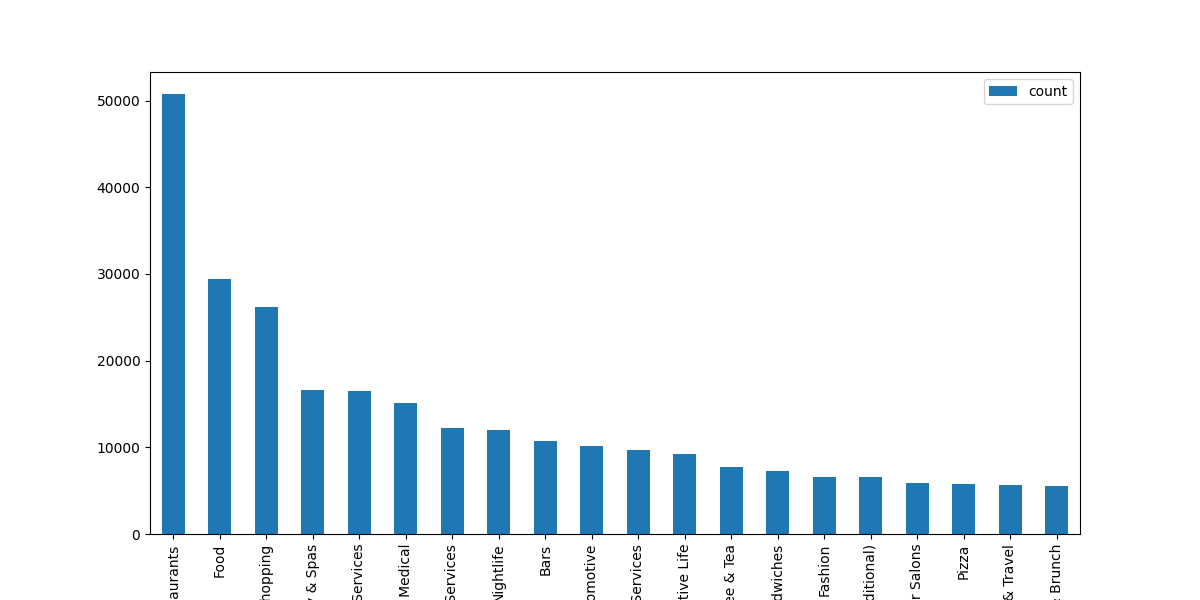

In [62]:
pdf = barchart_df.toPandas()
pdf = pdf.head(20)

pdf.plot(kind='bar', x='categories', figsize=(12,6))
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

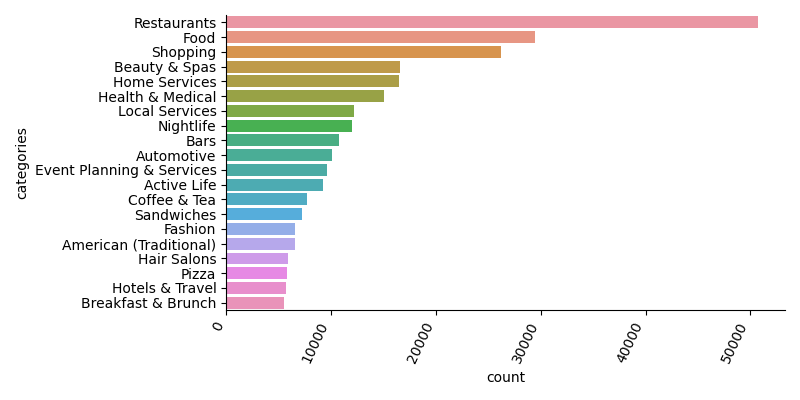

In [63]:
ax = sns.factorplot(x="count", y="categories", data=pdf,size=4, aspect=2, kind="bar")
for axes in ax.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=65, horizontalalignment='right')
plt.tight_layout()
plt.show()

%matplot plt

# Do Yelp Reviews Skew Negative?

Oftentimes, it is said that the only people who write a written review are those who are extremely _dissatisfied_ or extremely _satisfied_ with the service received. 

How true is this really? Let's try and answer this question.

## Loading User Data

Begin by loading the user data set from S3 and printing schema to determine what data is available.

In [64]:
yelp_review.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

Let's begin by listing the `business_id` and `stars` columns together for the user reviews data.

In [65]:
yelp_review.select('business_id','stars').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|         business_id|stars|
+--------------------+-----+
|buF9druCkbuXLX526...|  4.0|
|RA4V8pr014UyUbDvI...|  4.0|
|_sS2LBIGNT5NQb6PD...|  5.0|
|0AzLzHfOJgL7ROwhd...|  2.0|
|8zehGz9jnxPqXtOc7...|  4.0|
|xGXzsc-hzam-VArK6...|  1.0|
|EXOsmAB1s71WePlQk...|  2.0|
|DbXHNl890xSXNiyRc...|  5.0|
|mD-A9KOWADXvfrZfw...|  4.0|
|EEHhKSxUvJkoPSzeG...|  5.0|
|WQFn1A7-UAA4JT5YW...|  1.0|
|iZxfWlfNPXV_0S1xO...|  2.0|
|TA1KUSCu8GkWP9w0r...|  4.0|
|wZgUAuDuEGPEzKK-P...|  1.0|
|mw_qxZJraNu7Q6u0G...|  5.0|
|gGvNgShksetPoimyK...|  4.0|
|6Hm2FmfLcU_M91TrZ...|  5.0|
|KXCXaF5qimmtKKqnP...|  1.0|
|zmZ3HkVCeZPBefJJx...|  4.0|
|ZW7aI5FO_3q_vSzI4...|  5.0|
+--------------------+-----+
only showing top 20 rows

Now, let's aggregate along the `stars` column to get a resultant dataframe that displays _average stars_ per business as accumulated by users who **took the time to submit a written review**.

In [66]:
review_avg_stars = yelp_review.filter(yelp_review.text.isNotNull()).groupby(yelp_review.business_id).agg({"stars": "avg"})
review_avg_stars.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|         business_id|        avg(stars)|
+--------------------+------------------+
|Agq4zoNLSIpT1_ZJb...| 4.388571428571429|
|3ZVgig7uux9jVtEZn...| 4.019120458891013|
|HXYJIJ7lDhOUjaOvj...| 4.743589743589744|
|uSHEuUnh9d4kabRfs...| 3.686900958466454|
|8oz6JU_1D8PaLDNvq...|4.6521739130434785|
|bxy3khT-2R66tcdKj...| 3.986344537815126|
|Vq6VFZg0b9HKAfrEG...| 3.548262548262548|
|Hhc8Ix8sygBjqFbiO...| 3.111111111111111|
|2I1zJBC3QVMM0o3Aw...|           3.53125|
|zeqEqgEmTY3c7HkJm...|3.2580645161290325|
+--------------------+------------------+
only showing top 10 rows

Now the fun part - let's join our two dataframes (reviews and business data) by `business_id`. 

In [67]:
from pyspark.sql.functions import *

joined_buis_rev_AvgStr = yelp_business.join(review_avg_stars, on= ['business_id'],how='inner')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Let's see a few of these:

In [68]:
joined_buis_rev_AvgStr.select(['business_id', 'city','state','postal_code','stars','avg(stars)'])\
.orderBy('avg(stars)', ascending = False).show(5,False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------+-----------+-----+-----------+-----+----------+
|business_id           |city       |state|postal_code|stars|avg(stars)|
+----------------------+-----------+-----+-----------+-----+----------+
|4mn2NlgK6JECrzGZyaYUXQ|Lake Oswego|OR   |97034      |5.0  |5.0       |
|9sciguO8kA-K8lHZ-Gqzeg|Aloha      |OR   |97007      |5.0  |5.0       |
|6hZY5h3Pfa457NacB_uG0w|Vancouver  |WA   |98684      |5.0  |5.0       |
|1Q1XJD3DafqR_A15IlPU0w|Portland   |OR   |97209      |5.0  |5.0       |
|707ALr8W8s6_waj0x0pIQA|Portland   |OR   |97210      |5.0  |5.0       |
+----------------------+-----------+-----+-----------+-----+----------+
only showing top 5 rows

Compute a new dataframe that calculates what we will call the _skew_ (for lack of a better word) between the avg stars accumulated from written reviews and the _actual_ star rating of a business (ie: the average of stars given by reviewers who wrote an actual review **and** reviewers who just provided a star rating).

The formula you can use is something like:

```
(row['avg(stars)'] - row['stars']) / row['stars']
```

If the **skew** is negative, we can interpret that to be: reviewers who left a written response were more dissatisfied than normal. If **skew** is positive, we can interpret that to be: reviewers who left a written response were more satisfied than normal.

In [70]:
joined_with_skew = joined_buis_rev_AvgStr.withColumn('skew', (col('avg(stars)')/col('stars'))-1)
joined_with_skew.select('business_id', 'city','state','postal_code','stars','avg(stars)','skew').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------+-----+-----------+-----+------------------+--------------------+
|         business_id|        city|state|postal_code|stars|        avg(stars)|                skew|
+--------------------+------------+-----+-----------+-----+------------------+--------------------+
|-36nnCT71XE0InJXK...|   Vancouver|   WA|      98684|  2.0|1.9090909090909092|-0.04545454545454...|
|-QOl03c2B22yi_On0...|Pickerington|   OH|      43147|  3.0| 2.966292134831461|-0.01123595505617...|
|-VVUUPK0ytYjpJ_S7...|   Vancouver|   BC|    V5T 1J6|  3.0|  2.81981981981982|-0.06006006006006004|
|-ZzsPlaAgwO3yt29u...|      Austin|   TX|      78708|  5.0|               5.0|                 0.0|
|-gdR559hH89jagbHz...|      Boston|   MA|      02130|  4.5| 4.524271844660194|0.005393743257820827|
+--------------------+------------+-----+-----------+-----+------------------+--------------------+
only showing top 5 rows

And finally, graph it!

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

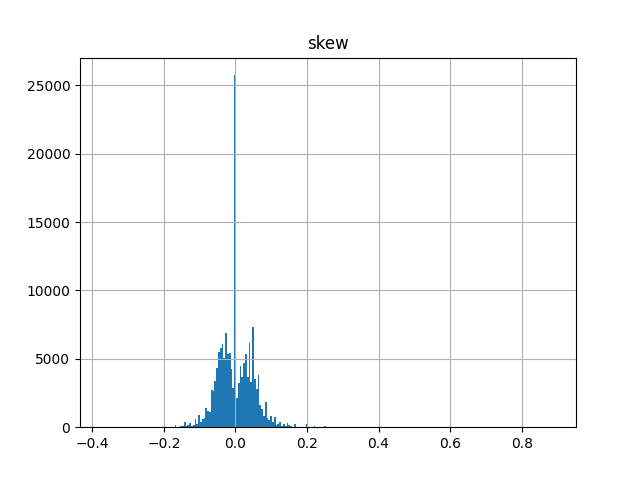

In [71]:
pdf2 = joined_with_skew.select('skew').toPandas()
pdf2.hist('skew', bins = 250)
%matplot plt

By just seeing the graph we cannot really tell if it is schewed to negative reviews. Because it seems that the center is around zero. We need statistical inference to conculde that.

So, do Yelp (written) Reviews skew negative? Does this analysis actually prove anything? Expound on implications / interpretations of this graph. 

# Should the Elite be Trusted? (Or, some other analysis of your choice)

For the final portion - you have a choice:

* Try and analyze some interesting dimension to this data. The **ONLY** requirement is that you must use the **Users** dataset and join on either the **business* or **reviews** dataset
* Or, you may try and answer the question posed: how accurate or close are the ratings of an "elite" user (check Users table schema) vs the actual business rating.

Feel free to use any and all methodologies at your disposal - only requirement is you must render one visualization in your analysis

In [74]:
yelp_user.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['average_stars', 'compliment_cool', 'compliment_cute', 'compliment_funny', 'compliment_hot', 'compliment_list', 'compliment_more', 'compliment_note', 'compliment_photos', 'compliment_plain', 'compliment_profile', 'compliment_writer', 'cool', 'elite', 'fans', 'friends', 'funny', 'name', 'review_count', 'useful', 'user_id', 'yelping_since']

In [75]:
yelp_user.select('user_id','elite','cool','fans','funny','useful').show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+-----+----+-----+------+
|             user_id|               elite| cool|fans|funny|useful|
+--------------------+--------------------+-----+----+-----+------+
|q_QQ5kBBwlCcbL1s4...|2006,2007,2008,20...|11291|1357|10030| 15038|
|dIIKEfOgo0KqUfGQv...|2007,2008,2009,20...|18046|1025|10289| 21272|
|D6ErcUnFALnCQN4b1...|           2010,2011|  130|  16|  128|   188|
|JnPIjvC0cmooNDfsa...|2009,2010,2011,20...| 4035| 420| 4722|  7234|
|37Hc8hr3cw0iHLoPz...|      2009,2010,2011| 1124|  47|  727|  1577|
|n-QwITZYrXlKQRiV3...|2010,2011,2012,20...|  140|  17|  101|   476|
|eCJoZqpV1fDKJGAsX...|                    |   16|   1|   14|    53|
|cojecOwQJpsYDxnjt...|           2010,2011|   44|   4|   47|   136|
|1jXmzuIFKxTnEnR0p...|2010,2011,2012,20...|  121|  23|  106|   381|
|-8QoOIfvwwxJ4sY20...|2012,2013,2014,20...|  306|  25|  220|   752|
+--------------------+--------------------+-----+----+-----+------+
only showing top 10 rows

In [76]:
yelp_review.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['business_id', 'cool', 'date', 'funny', 'review_id', 'stars', 'text', 'useful', 'user_id']

In [25]:
yelp_review.select('review_id','business_id','user_id','stars').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+--------------------+-----+
|           review_id|         business_id|             user_id|stars|
+--------------------+--------------------+--------------------+-----+
|lWC-xP3rd6obsecCY...|buF9druCkbuXLX526...|ak0TdVmGKo4pwqdJS...|  4.0|
|8bFej1QE5LXp4O05q...|RA4V8pr014UyUbDvI...|YoVfDbnISlW0f7abN...|  4.0|
|NDhkzczKjLshODbqD...|_sS2LBIGNT5NQb6PD...|eC5evKn1TWDyHCyQA...|  5.0|
|T5fAqjjFooT4V0OeZ...|0AzLzHfOJgL7ROwhd...|SFQ1jcnGguO0LYWnb...|  2.0|
|sjm_uUcQVxab_EeLC...|8zehGz9jnxPqXtOc7...|0kA0PAJ8QFMeveQWH...|  4.0|
+--------------------+--------------------+--------------------+-----+
only showing top 5 rows

In [77]:
joined_user_review = yelp_user.join(yelp_review, on= ['user_id'],how='inner')
joined_user_review.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['user_id', 'average_stars', 'compliment_cool', 'compliment_cute', 'compliment_funny', 'compliment_hot', 'compliment_list', 'compliment_more', 'compliment_note', 'compliment_photos', 'compliment_plain', 'compliment_profile', 'compliment_writer', 'cool', 'elite', 'fans', 'friends', 'funny', 'name', 'review_count', 'useful', 'yelping_since', 'business_id', 'cool', 'date', 'funny', 'review_id', 'stars', 'text', 'useful']

In [27]:
joined_user_review.select('user_id','average_stars','business_id','elite','stars').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------------+--------------------+-----+-----+
|             user_id|average_stars|         business_id|elite|stars|
+--------------------+-------------+--------------------+-----+-----+
|--hJsDxzXZURcLxaL...|          5.0|Ln-8CbKGZGmF-GCqM...|     |  5.0|
|--hJsDxzXZURcLxaL...|          5.0|QS_ojFa7FpfOVThrs...|     |  5.0|
|-0Ji0nOyFe-4yo8BK...|         3.09|1hJEqPHe65oJmO6sc...|     |  2.0|
|-0KAIqdO-DhrIXcY9...|         3.67|WyIk1ZWy31Qaa8xUi...|     |  5.0|
|-0KAIqdO-DhrIXcY9...|         3.67|GtlDQ8GG8ykG1ion3...|     |  5.0|
+--------------------+-------------+--------------------+-----+-----+
only showing top 5 rows

In [80]:
joined_user_review_flt = joined_user_review.filter(col('elite').isNotNull()).filter(col('elite') != '')
joined_user_review_flt.select('user_id','average_stars','business_id','elite','stars').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------------+--------------------+--------------------+-----+
|             user_id|average_stars|         business_id|               elite|stars|
+--------------------+-------------+--------------------+--------------------+-----+
|-1KKYzibGPyUX-Mwk...|          4.0|ROa5tRU4lUn1ffu0H...|2011,2012,2013,20...|  5.0|
|-1KKYzibGPyUX-Mwk...|          4.0|SFqFFIA4Ks2oHfgEA...|2011,2012,2013,20...|  5.0|
|-3i9bhfvrM3F1wsC9...|         4.12|9-gSCzV0UsZuO07m6...|2007,2008,2009,20...|  5.0|
|-3i9bhfvrM3F1wsC9...|         4.12|-xoNaQQz6nh3QfRx9...|2007,2008,2009,20...|  5.0|
|-3i9bhfvrM3F1wsC9...|         4.12|H6UPhaA9lVe2w07QC...|2007,2008,2009,20...|  4.0|
+--------------------+-------------+--------------------+--------------------+-----+
only showing top 5 rows

In [81]:
joined_user_review_flt=joined_user_review_flt.withColumn('diff', col('average_stars')-col('stars'))
joined_user_review_flt.select('user_id','average_stars','business_id','elite','stars','diff').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------------+--------------------+--------------------+-----+------------------+
|             user_id|average_stars|         business_id|               elite|stars|              diff|
+--------------------+-------------+--------------------+--------------------+-----+------------------+
|-1KKYzibGPyUX-Mwk...|          4.0|SFqFFIA4Ks2oHfgEA...|2011,2012,2013,20...|  5.0|              -1.0|
|-1KKYzibGPyUX-Mwk...|          4.0|ROa5tRU4lUn1ffu0H...|2011,2012,2013,20...|  5.0|              -1.0|
|-3i9bhfvrM3F1wsC9...|         4.12|H6UPhaA9lVe2w07QC...|2007,2008,2009,20...|  4.0|0.1200000000000001|
|-3i9bhfvrM3F1wsC9...|         4.12|4CxF8c3MB7VAdY8zF...|2007,2008,2009,20...|  3.0|              1.12|
|-3i9bhfvrM3F1wsC9...|         4.12|wVTbg_ZOjqYwMNTdf...|2007,2008,2009,20...|  4.0|0.1200000000000001|
+--------------------+-------------+--------------------+--------------------+-----+------------------+
only showing top 5 rows

In [82]:
joined_user_review_flt.select('diff').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+
|              diff|
+------------------+
|              -1.0|
|              -1.0|
|0.1200000000000001|
|              1.12|
|0.1200000000000001|
+------------------+
only showing top 5 rows

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

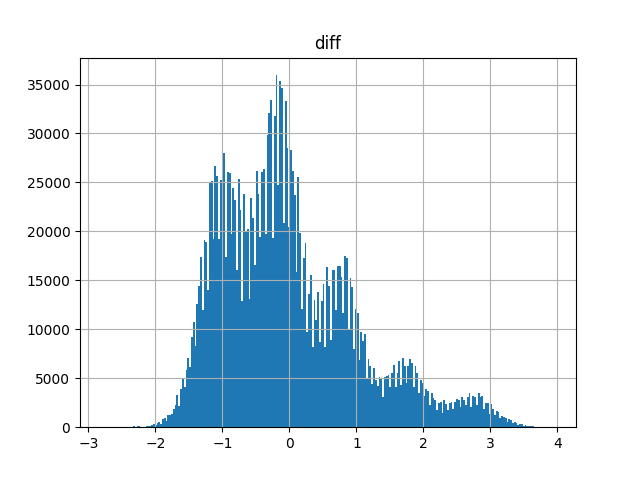

In [31]:
pdf3 = joined_user_review_flt.select('diff').toPandas()

pdf3.hist('diff', bins = 250)

%matplot plt

It seems that the histogram of the difference between average stars from elite users and the business stars is not centered around zero. Moreover, it is skewed to the right. That means elite users have more positive reviews that the business average. We need t-test for this hypothesis testing.

In [83]:
from pyspark.sql.functions import mean as _mean, stddev as _stddev, col
import scipy.stats

df_stats = joined_user_review_flt.select(
    _mean(col('diff')).alias('mean'),
    _stddev(col('diff')).alias('std')
).collect()

n = joined_user_review_flt.select('diff').count()
mean = df_stats[0]['mean']
std = df_stats[0]['std']
t = mean/ (std/n**0.5)
t_score = scipy.stats.t.ppf(0.975, n - 1)
print(f'\n n:{n} \n mean: {mean} \n Standard Deviation: {std} \n t-value: {t} \n t_score:{t_score}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…


 n:2169088 
 mean: -0.005305225053109854 
 Standard Deviation: 1.0353899236134665 
 t-value: -7.546376405754041 
 t_score:1.9599650782133513

Null Hypothesis : Mean for elite average starst are the same as business stars. <br>
Alternative Hypothesis : They are not the same. <br>
Since t-value is greater than t_score = 1.96 at alpha= 0.05 we reject the null hypothesis. <br>

# Additional Analysis
We would like to see if useful from review dataset agress on useful from user dataset.

In [86]:
yelp_review2 = yelp_review.withColumnRenamed("useful","useful2")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [97]:
joined_user_review2 = yelp_user.join(yelp_review2, on= ['user_id'],how='inner')
#joined_user_review2 = joined_user_review2.filter(col('useful').isNotNull()).filter(col('useful') != '')
#joined_user_review2 = joined_user_review2.filter(col('useful2').isNotNull()).filter(col('useful2') != '')
joined_user_review2.select('useful', 'useful2').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------+-------+
|useful|useful2|
+------+-------+
|     0|      0|
|     0|      0|
|    99|      1|
|    11|      0|
|    11|      0|
|    11|      0|
|    11|      1|
|    11|      1|
|    11|      0|
|    11|      0|
|    11|      0|
|    11|      1|
|    11|      1|
|     1|      1|
|   141|      1|
|   141|      1|
|    15|      0|
|    15|      0|
|    15|      0|
|    15|      0|
+------+-------+
only showing top 20 rows

In [94]:
pdf_useful = joined_user_review2.select('useful2','useful').toPandas()
pdf_useful.hist('useful2','useful', bins = 250)
%matplot plt



VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of columns must be > 0, not 0
Traceback (most recent call last):
  File "/tmp/1619211940176-0/local/lib64/python3.6/site-packages/pandas/plotting/_core.py", line 208, in hist_frame
    **kwargs,
  File "/tmp/1619211940176-0/local/lib64/python3.6/site-packages/pandas/plotting/_matplotlib/hist.py", line 377, in hist_frame
    **kwds,
  File "/tmp/1619211940176-0/local/lib64/python3.6/site-packages/pandas/plotting/_matplotlib/hist.py", line 266, in _grouped_hist
    rot=rot,
  File "/tmp/1619211940176-0/local/lib64/python3.6/site-packages/pandas/plotting/_matplotlib/hist.py", line 194, in _grouped_plot
    naxes=naxes, figsize=figsize, sharex=sharex, sharey=sharey, ax=ax, layout=layout
  File "/tmp/1619211940176-0/local/lib64/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py", line 233, in _subplots
    ax0 = fig.add_subplot(nrows, ncols, 1, **subplot_kw)
  File "/tmp/1619211940176-0/local/lib64/python3.6/site-packages/matplotlib/figure.py", line 1419, in add_subplot
   

In [93]:
import numpy as np
import matplotlib.pyplot as plt
pdf_useful = joined_user_review2.select('useful2','useful').toPandas()
bins = np.linspace(-10, 10, 50)

plt.hist(joined_user_review2['useful'], bins, alpha = 0.5, label='a')
plt.hist(joined_user_review2['useful2'], bins, alpha = 0.5, label='b')
plt.legend(loc='upper left')

plt.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Cannot convert column into bool: please use '&' for 'and', '|' for 'or', '~' for 'not' when building DataFrame boolean expressions.
Traceback (most recent call last):
  File "/tmp/1619211940176-0/local/lib64/python3.6/site-packages/matplotlib/pyplot.py", line 2610, in hist
    if data is not None else {}), **kwargs)
  File "/tmp/1619211940176-0/local/lib64/python3.6/site-packages/matplotlib/__init__.py", line 1565, in inner
    return func(ax, *map(sanitize_sequence, args), **kwargs)
  File "/tmp/1619211940176-0/local/lib64/python3.6/site-packages/matplotlib/axes/_axes.py", line 6569, in hist
    x = cbook._reshape_2D(x, 'x')
  File "/tmp/1619211940176-0/local/lib64/python3.6/site-packages/matplotlib/cbook/__init__.py", line 1379, in _reshape_2D
    elif X.ndim == 1 and np.ndim(X[0]) == 0:
  File "/usr/lib/spark/python/lib/pyspark.zip/pyspark/sql/column.py", line 690, in __nonzero__
    raise ValueError("Cannot convert column into bool: please use '&' for 'and', '|' for 'or', "
ValueEr

In [95]:
import seaborn as sns
x = joined_user_review2.select('useful').toPandas()
y = joined_user_review2.select('useful2').toPandas()
sns.distplot([x, y])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

cannot copy sequence with size 0 to array axis with dimension 1
Traceback (most recent call last):
  File "/tmp/1619211940176-0/local/lib/python3.6/site-packages/seaborn/distributions.py", line 2574, in distplot
    a = np.asarray(a, float)
  File "/usr/local/lib64/python3.6/site-packages/numpy/core/numeric.py", line 492, in asarray
    return array(a, dtype, copy=False, order=order)
ValueError: cannot copy sequence with size 0 to array axis with dimension 1



In [37]:
%%info

ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
4,application_1619195316014_0005,pyspark,idle,Link,Link,✔
